<a href="https://colab.research.google.com/github/DEBADAS001KERNEL/END_TO_END_MACHINE_LEARNING_PROJECTS/blob/main/Crop_Type_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Crop Type Detection Model:

**The crop type detection model aims to predict the most suitable crop to be cultivated in a specific area based on various agricultural and environmental parameters. The model leverages machine learning techniques to analyze data on soil nutrients, climate conditions, and other factors, thus providing valuable insights for optimizing agricultural practices.**

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
d=pd.read_csv('/content/Crop_Recommendation (1).csv')

In [46]:
d.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [18]:
d['Crop'].value_counts() # or target column


Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [19]:
d.shape

(2200, 8)

In [20]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**we can clearly see, that there is no catagorical column in the dataset**

In [24]:
c=['Nitrogen','Phosphorus','Potassium','Temperature', 'Humidity', 'pH_Value', 'Rainfall']

**UNIVARIATE ANALYSIS**

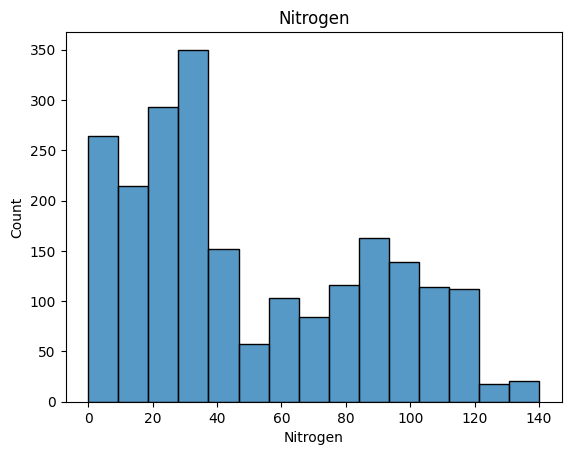

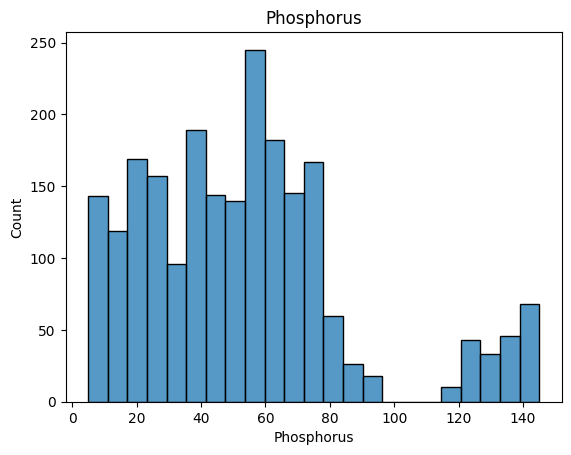

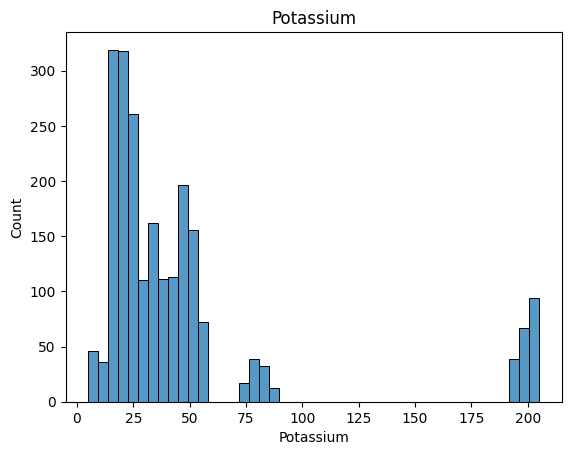

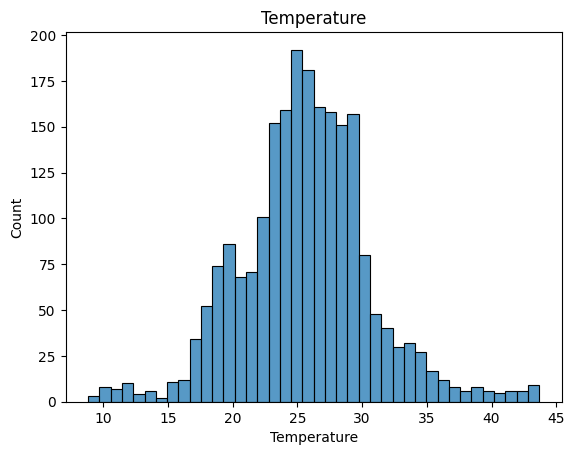

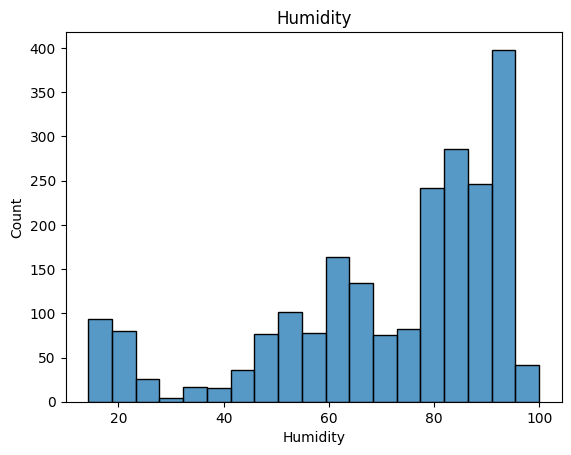

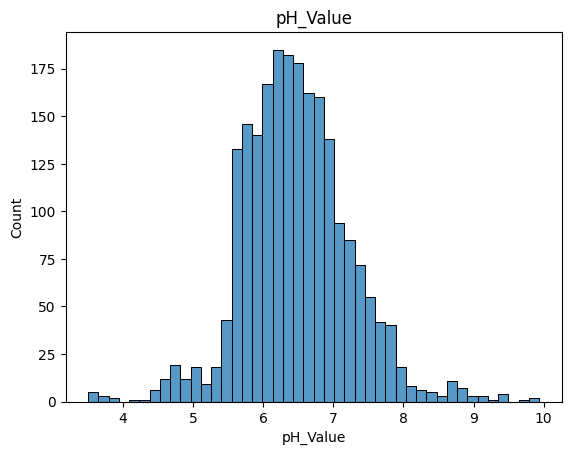

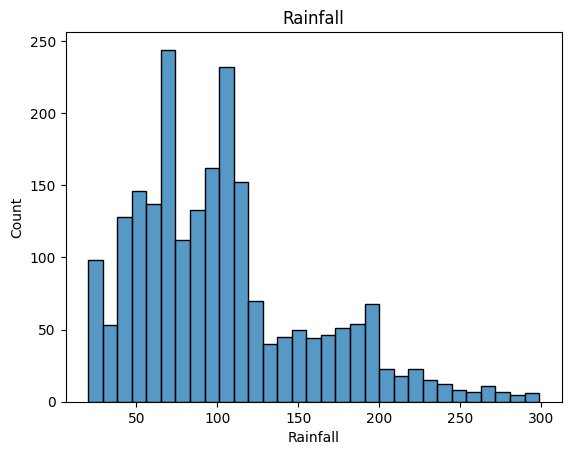

In [25]:
#histplot
for i in c:
  sns.histplot(d[i])
  plt.title(i)
  plt.show()

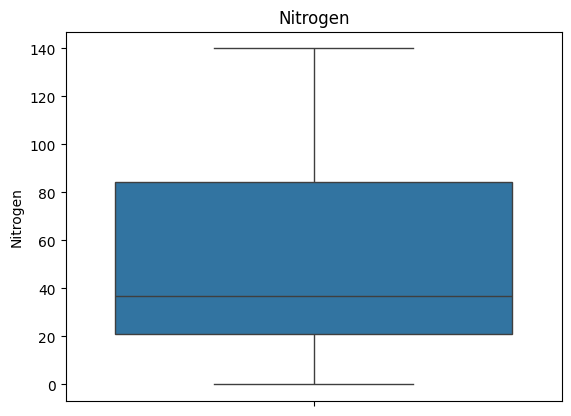

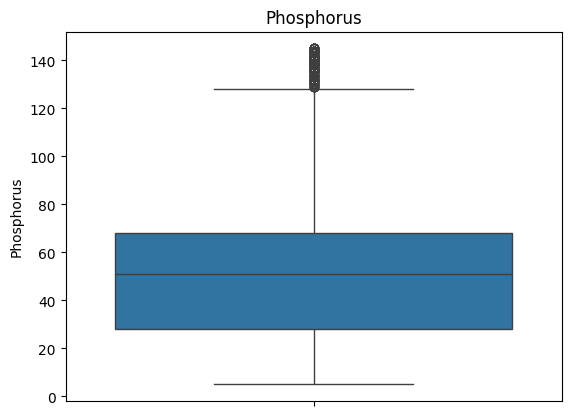

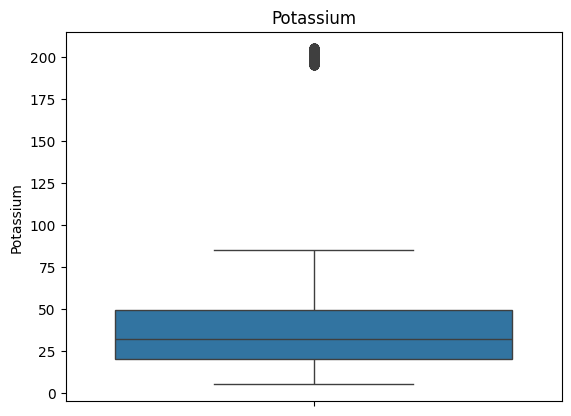

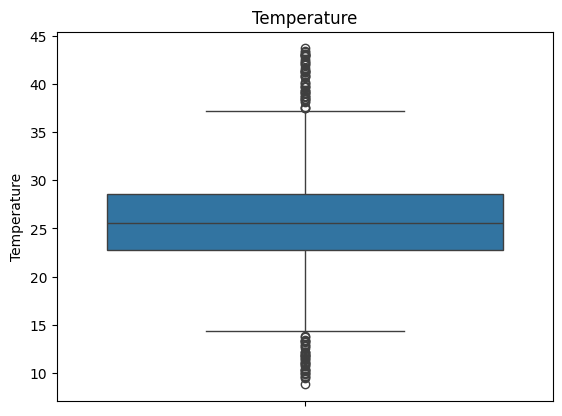

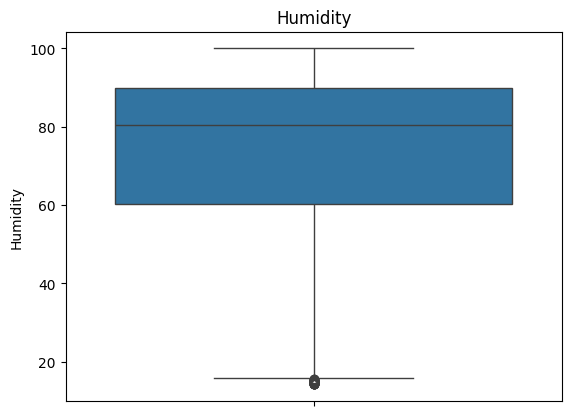

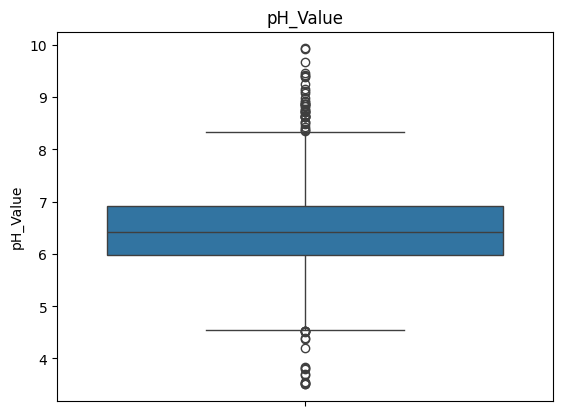

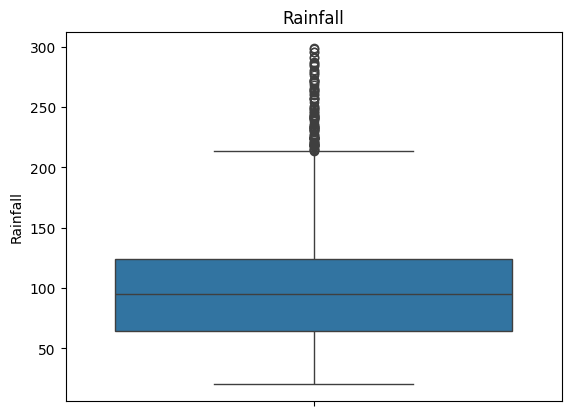

In [26]:
#boxplot[outliars]
for i in c:
  sns.boxplot(d[i])
  plt.title(i)
  plt.show()

In [47]:
# remove outliars

def remove_outliers(df, columns):
  for column in columns:
    # Calculate the interquartile range (IQR)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

  return df

# Remove outliers from the specified columns
d = remove_outliers(d, c)


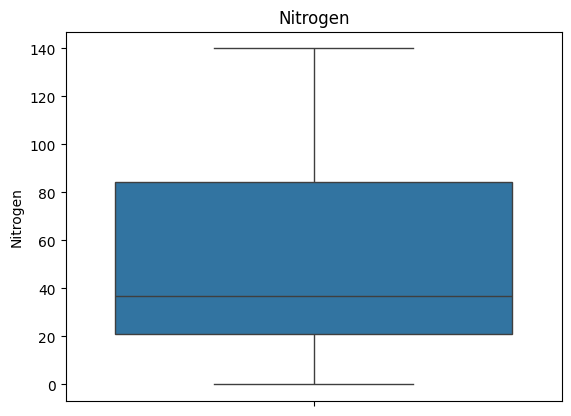

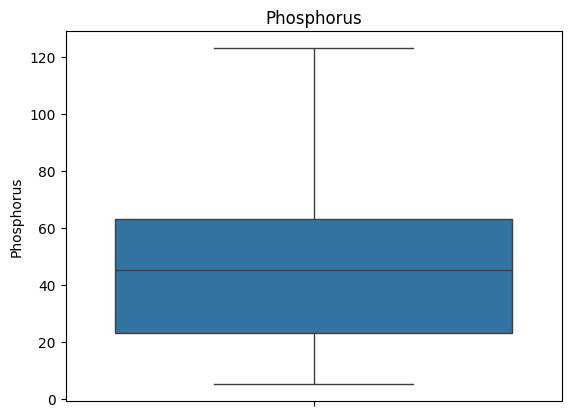

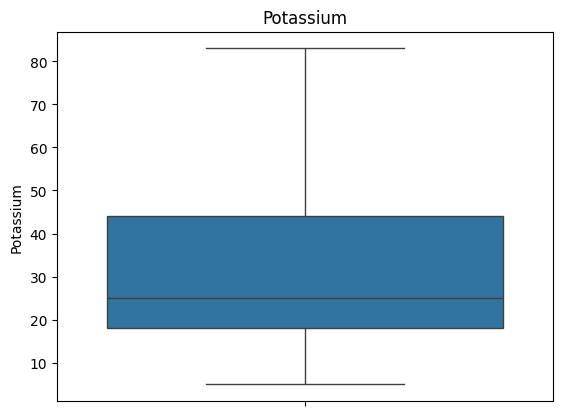

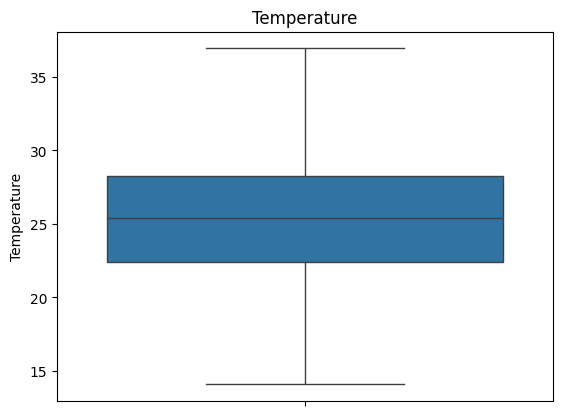

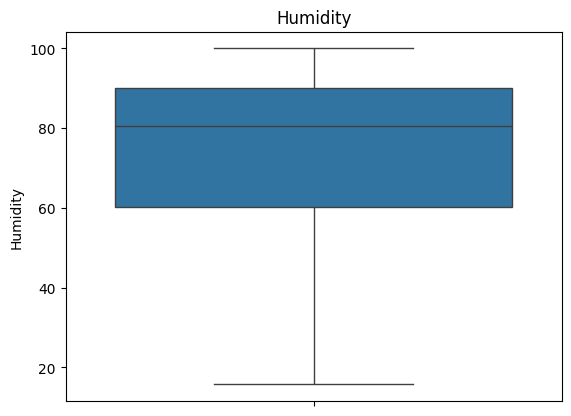

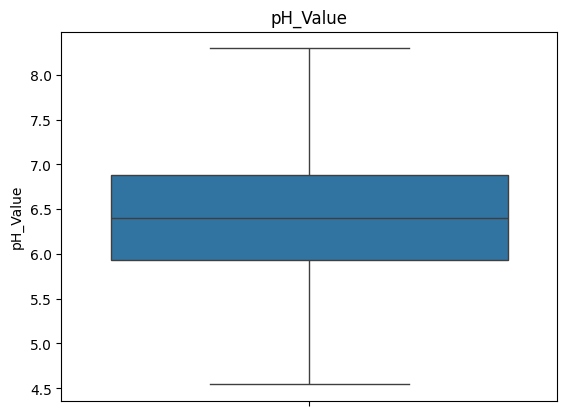

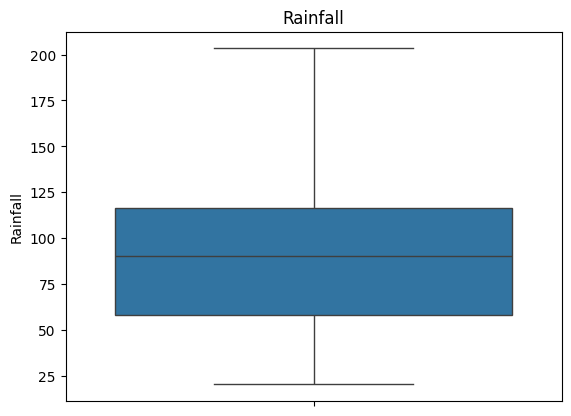

In [31]:
for i in c:
  sns.boxplot(d[i])
  plt.title(i)
  plt.show()

In [48]:
 #duplicate rows remove

d.drop_duplicates(inplace=True)
d.duplicated().sum()

0

**let's see the big picture**

In [36]:
!pip install ydata-profiling

import pandas as pd
from ydata_profiling import ProfileReport


# Generating the profile report
profile = ProfileReport(d)
profile.to_file(output_file="crops.html")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**the name of the file is crops.html, check it in the file directory**

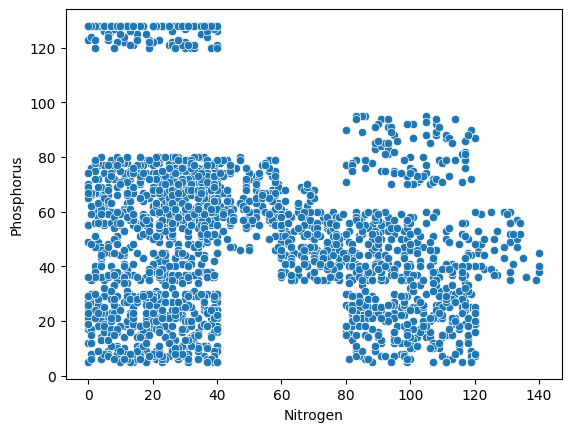

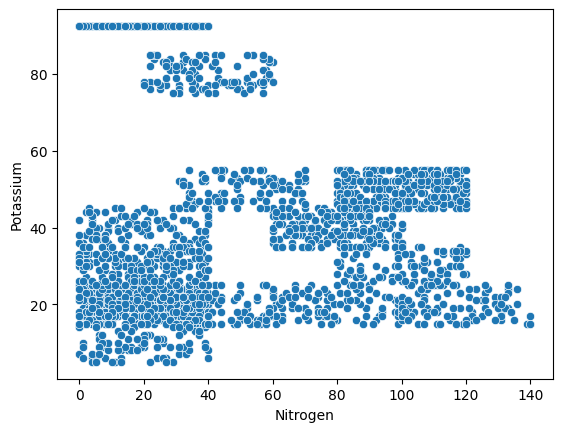

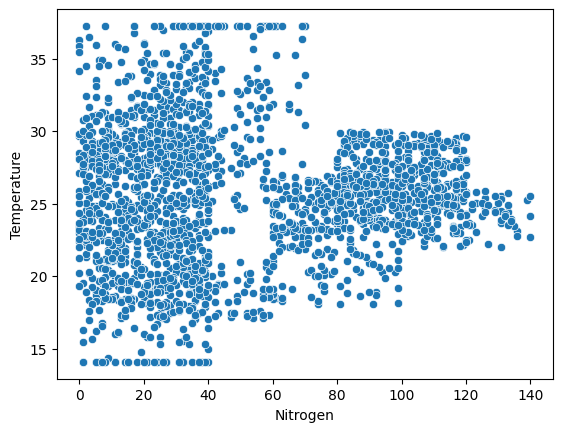

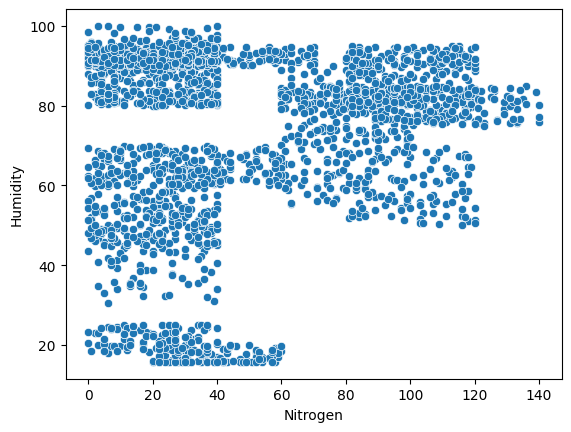

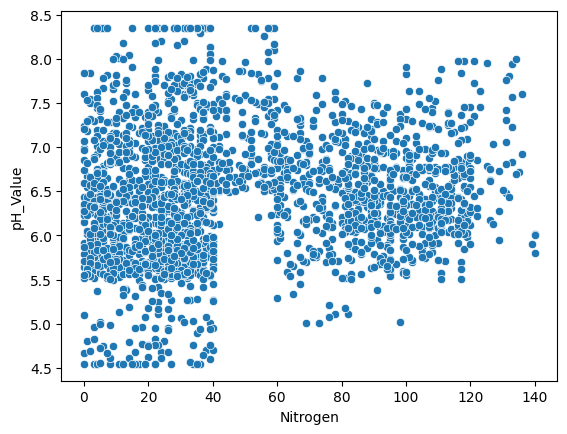

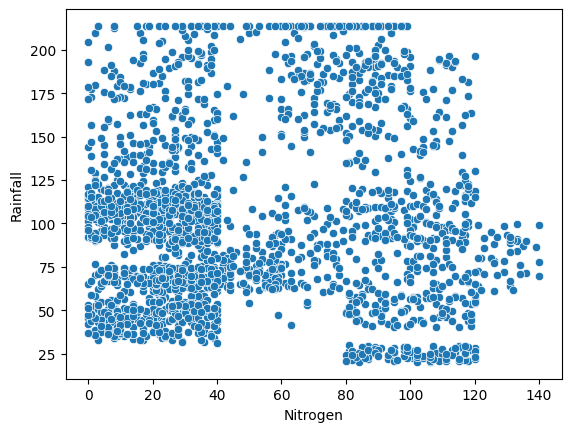

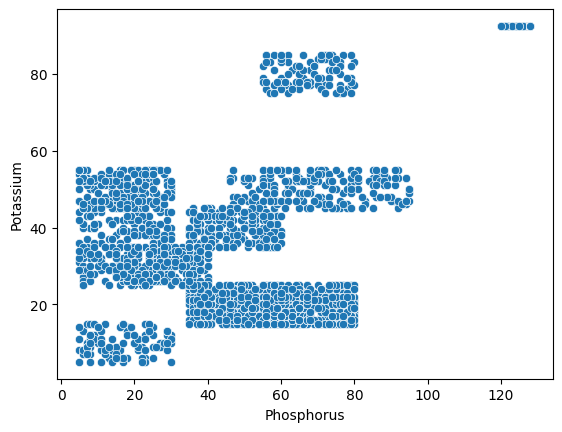

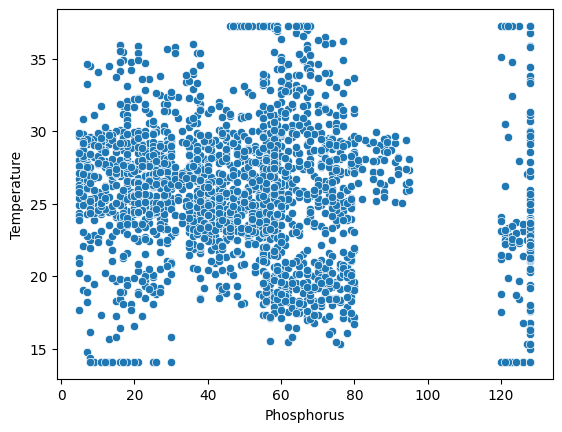

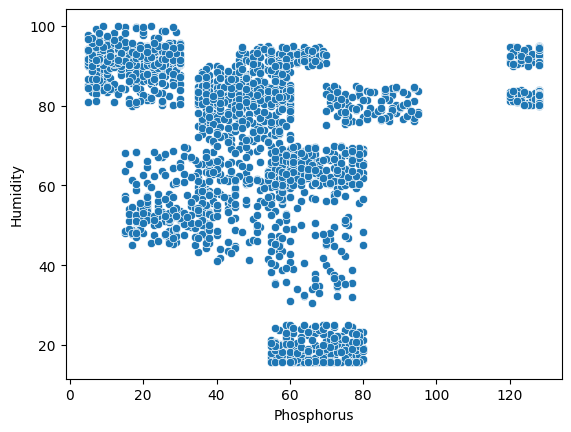

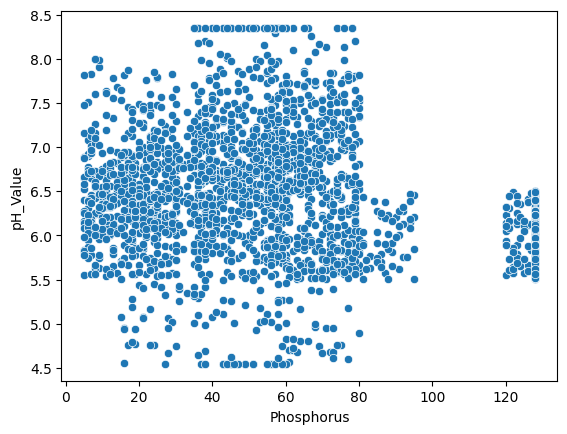

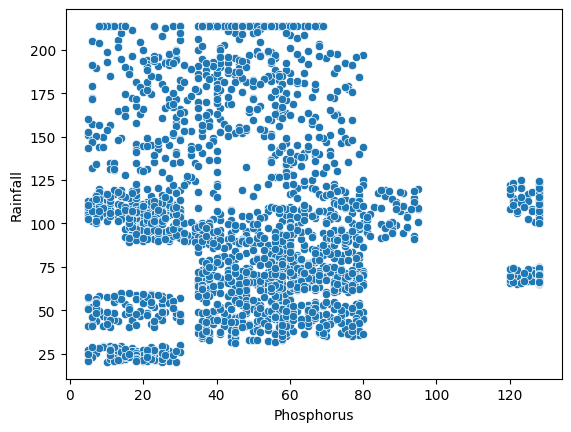

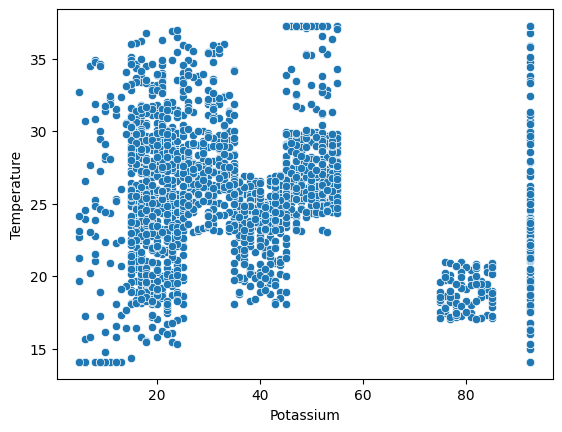

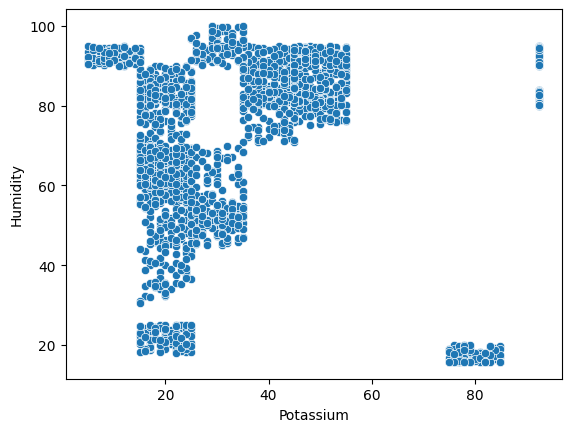

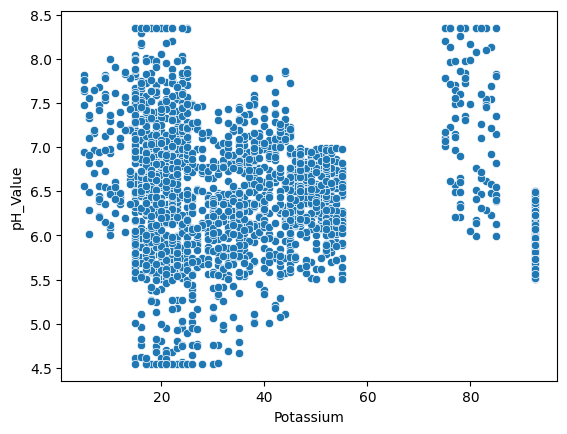

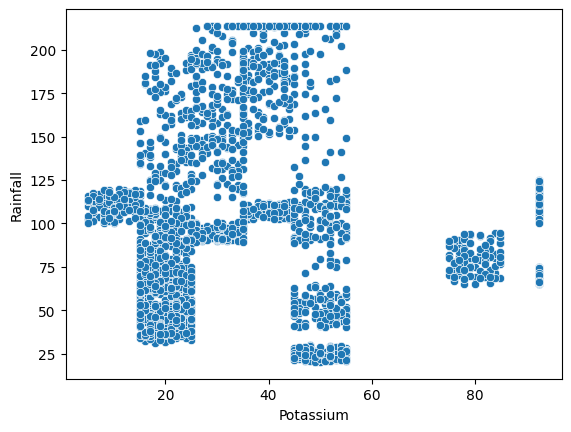

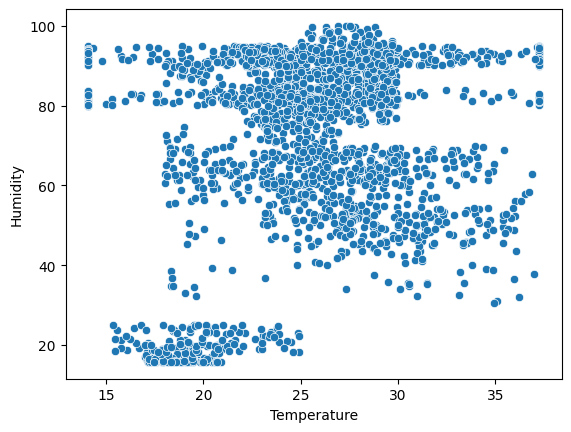

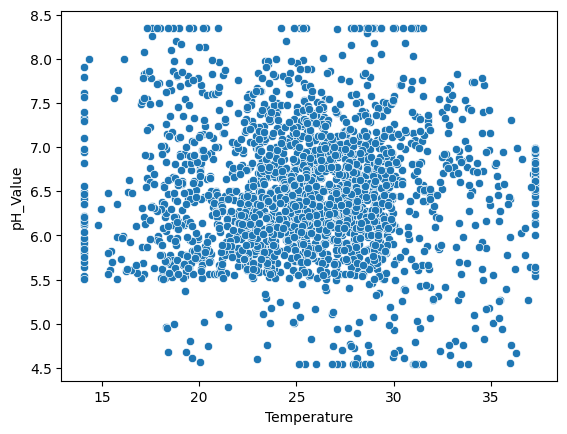

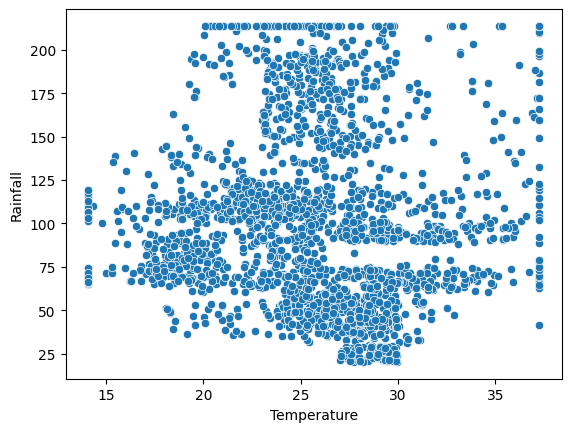

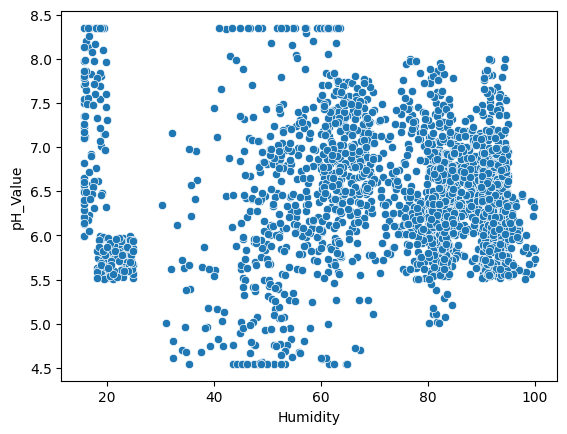

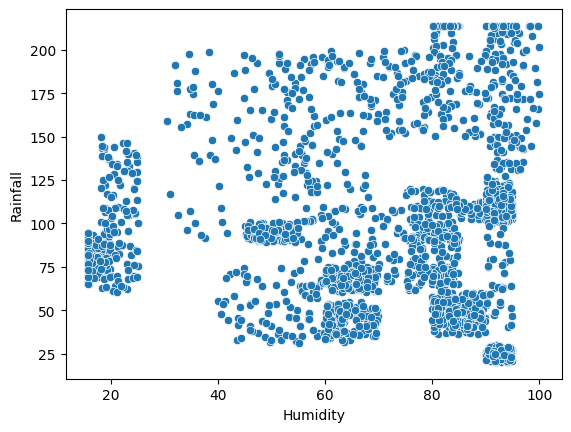

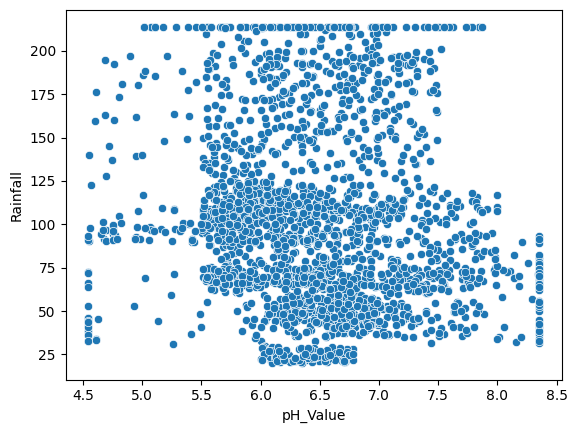

In [49]:
#  scatterplot

import matplotlib.pyplot as plt
for i in range(len(c)):
  for j in range(i+1, len(c)):
    sns.scatterplot(x=d[c[i]], y=d[c[j]])
    plt.show()


**preprocessing**

In [50]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
d['Crop']=le.fit_transform(d['Crop'])

In [51]:
d.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41.0,21.770462,80.319644,7.038096,213.841241,20
2,60,55,44.0,23.004459,82.320763,7.840207,213.841241,20
3,74,35,40.0,26.491096,80.158363,6.980401,213.841241,20
4,78,42,42.0,20.130175,81.604873,7.628473,213.841241,20


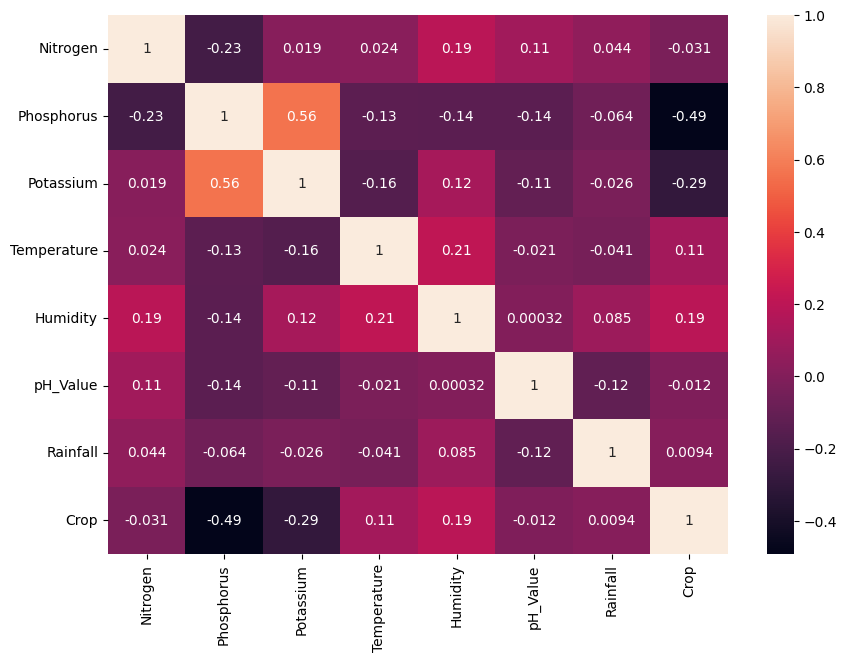

In [63]:
# prompt: HEATMAP

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(d.corr(), annot=True)
plt.show()


In [52]:
d['Crop'].value_counts()

Crop
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [53]:
x=d.drop('Crop',axis=1)
y=d['Crop']

In [54]:
# prompt: traintest

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [55]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [56]:
y_train

1656    16
752      2
892     10
1041     1
1179    12
        ..
1638    16
1095     1
1130    12
1294     7
860     10
Name: Crop, Length: 1760, dtype: int64

**use random forest, cause  it's best :)**

In [57]:
# prompt: use random forest then accurecy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9931818181818182


**use NN**

In [60]:


# Import the necessary libraries
import tensorflow as tf

# Define the neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(len(x_train[0]),)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(len(d['Crop'].value_counts()), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
hist=model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test))

# Evaluate the model
accuracy = model.evaluate(x_test, y_test)[1]

# Print the accuracy
print("Accuracy:", accuracy)


Epoch 1/100
55/55 [==============================] - 1s 8ms/step - loss: 2.8466 - accuracy: 0.1528 - val_loss: 2.4755 - val_accuracy: 0.3091
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 1.9391 - accuracy: 0.4148 - val_loss: 1.3927 - val_accuracy: 0.5364
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.9424 - accuracy: 0.7199 - val_loss: 0.6242 - val_accuracy: 0.8386
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.8926 - val_loss: 0.3811 - val_accuracy: 0.8841
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 0.2787 - accuracy: 0.9244 - val_loss: 0.2924 - val_accuracy: 0.9114
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.9438 - val_loss: 0.2401 - val_accuracy: 0.9205
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1601 - accuracy: 0.9517 - val_loss: 0.2086 - val_accuracy: 0.9250
Epoch 8/100
5

**the accuracy is 99%... so it's perfect**

<Axes: >

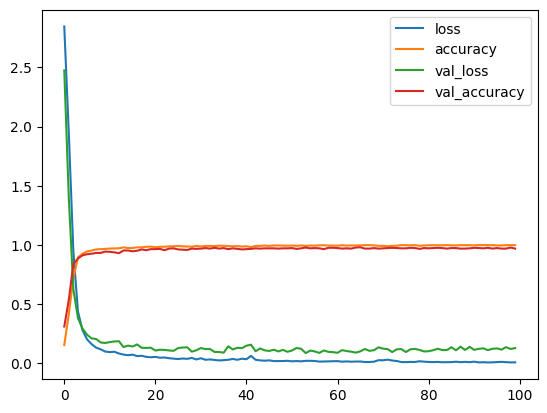

In [61]:
pd.DataFrame(hist.history).plot()

In [62]:
#  save the model

model.save('crop_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
